### Data Overview ###

This data set is obtained from https://archive.ics.uci.edu/dataset/222/bank+marketing and is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Dataset Information ###
**Additional Information**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


***Importing Libraries***

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Data Loading***

In [71]:
# Load the dataset
df = pd.read_csv('../data/bank-additional.csv', delimiter=';')

# Get the info about the dataframe
df.info()

# Get few rows of the dataframe
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [72]:
# Drop Null Value
new_df = df.dropna()

In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

***Data has no null values. Its has 4119 entries and 21 columns which is same as original dataframe***

Aggregation of Term Deposit Value:
 y
no     0.890507
yes    0.109493
Name: proportion, dtype: float64


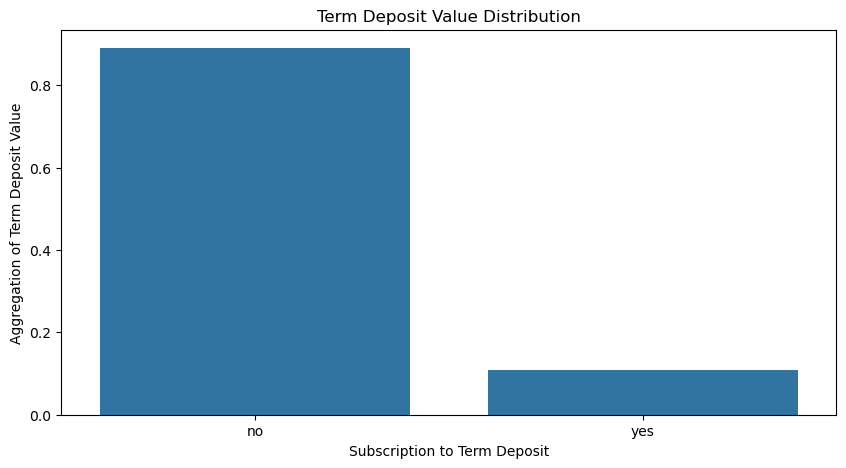

In [74]:

# Aggregrate the Term Deposit Values
term_deposit_value = new_df['y'].value_counts(normalize=True)
print("Aggregation of Term Deposit Value:\n", term_deposit_value)

# Plot the Term Deposit Values
plt.figure(figsize=(10, 5))
sns.barplot(x=term_deposit_value.index, y=term_deposit_value.values)
plt.title('Term Deposit Value Distribution')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Aggregation of Term Deposit Value')
plt.show()



#### Additional Variable Information
##### Description from Bank client data:
    - age (numeric)
    - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
    - education (categorical:"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    - default: has credit in default? (categorical: "no","yes","unknown")
    - housing: has housing loan? (categorical: "no","yes","unknown")
    - loan: has personal loan? (categorical: "no","yes","unknown")

##### Description related with the last contact of the current campaign:
    - contact: contact communication type (categorical: "cellular","telephone") 
    - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
##### Description for other attributes:
    - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    - previous: number of contacts performed before this campaign and for this client (numeric)
    - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
##### Description for social and economic context attributes
    - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    - cons.price.idx: consumer price index - monthly indicator (numeric)     
    - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    - euribor3m: euribor 3 month rate - daily indicator (numeric)
    - nr.employed: number of employees - quarterly indicator (numeric)

In [75]:
#Create two Feature sets - Numeric & Categorical
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']

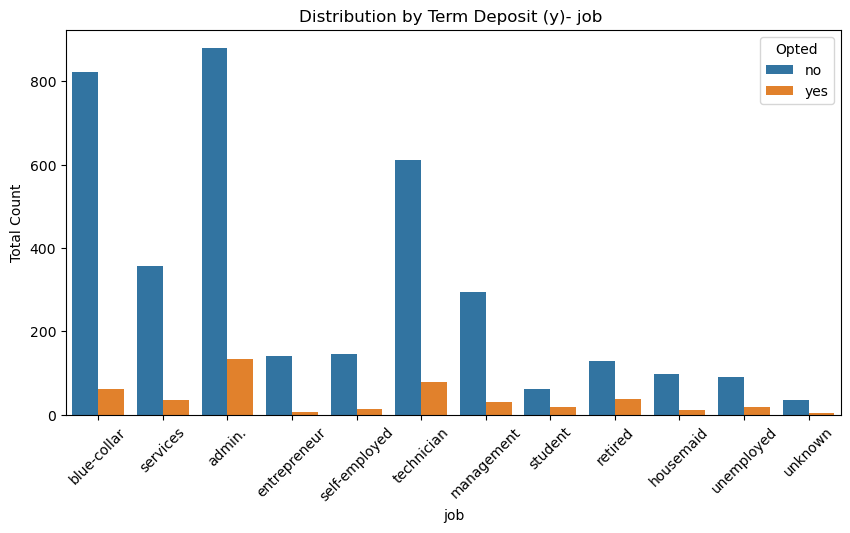

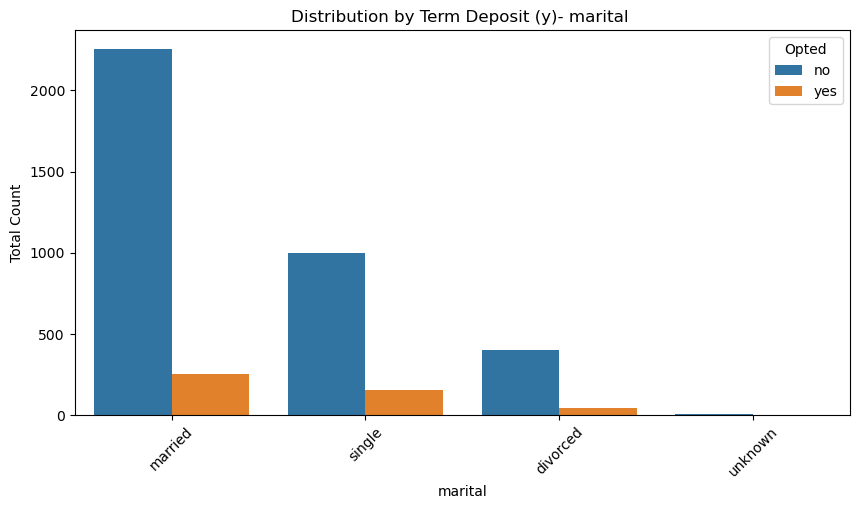

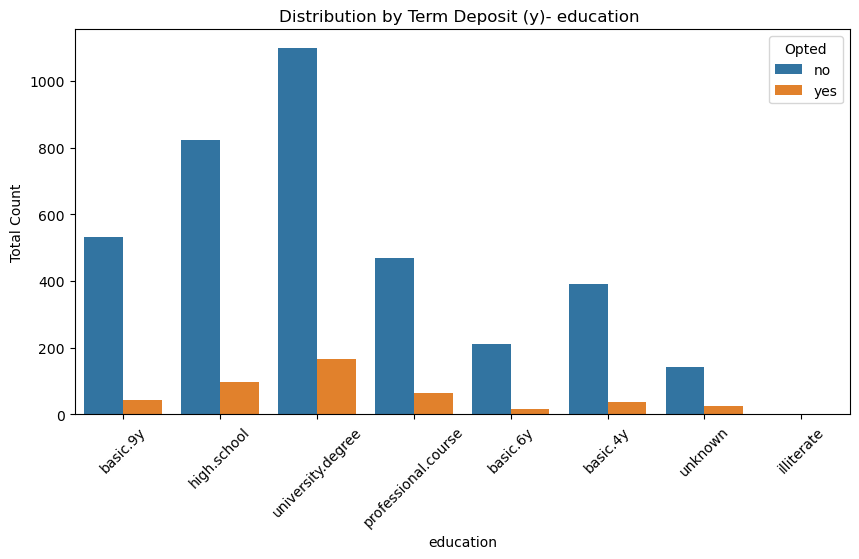

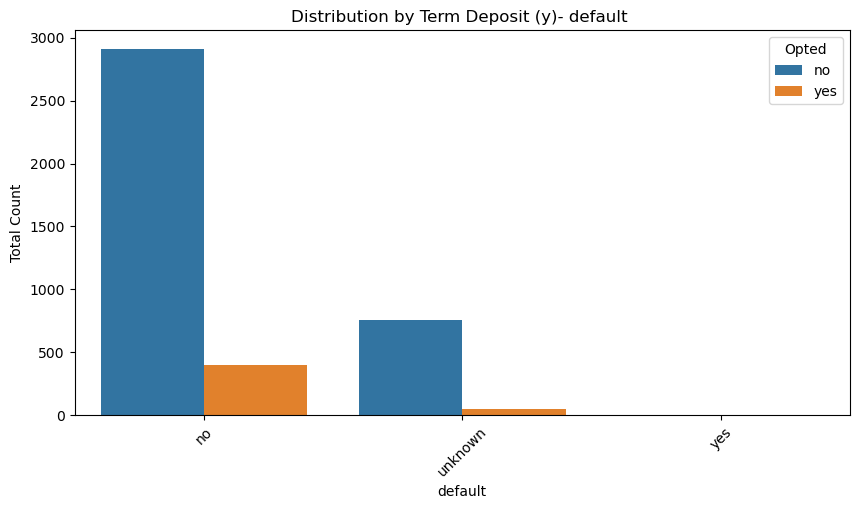

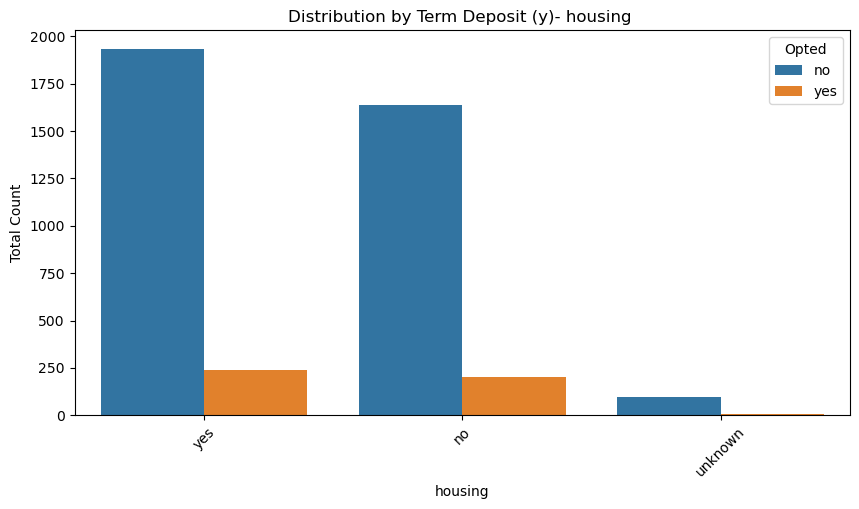

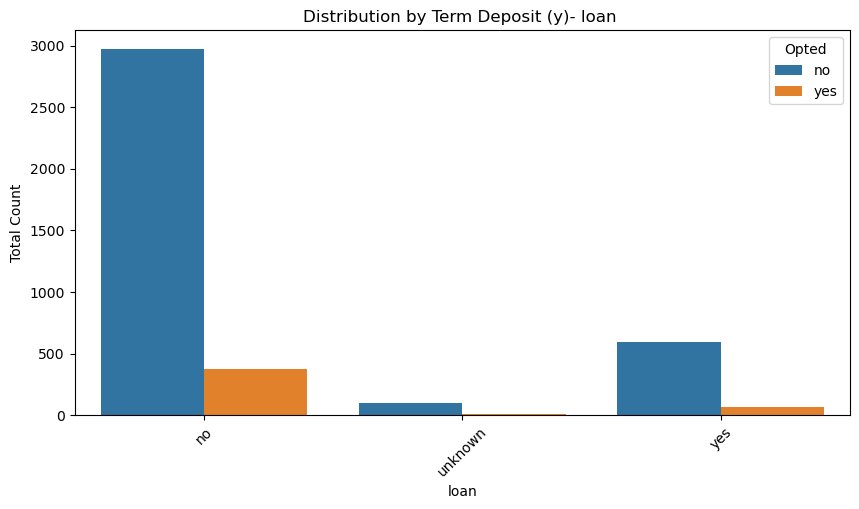

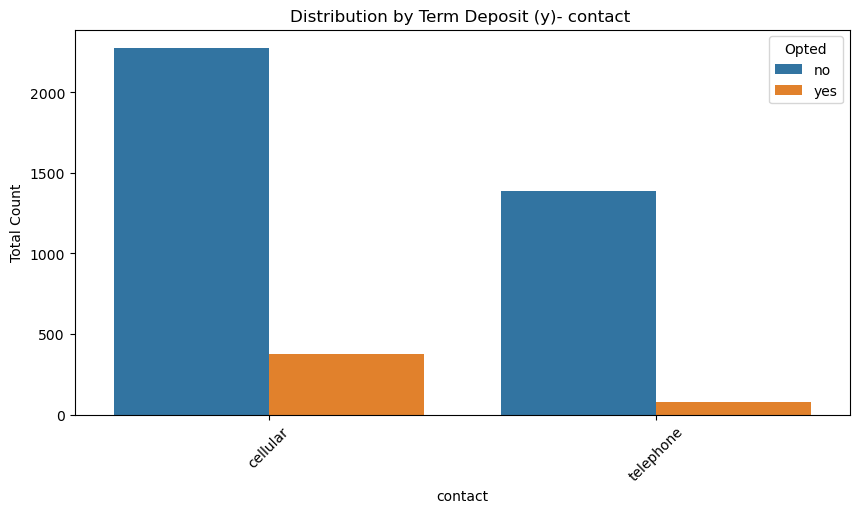

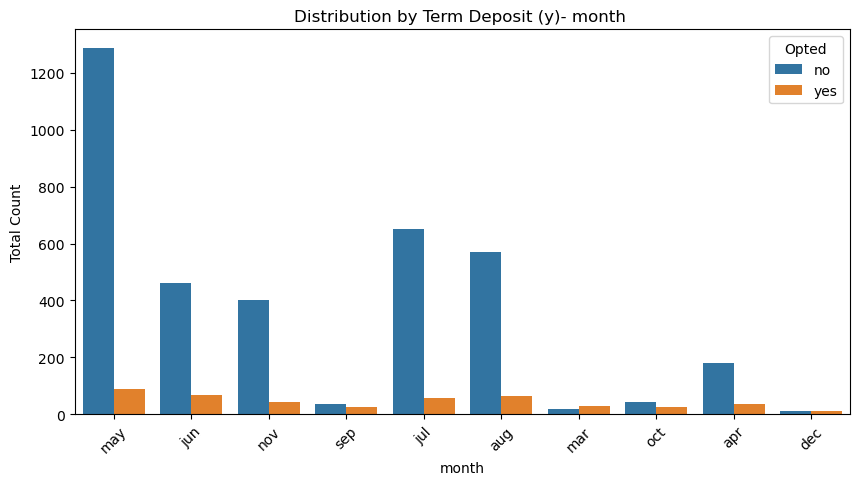

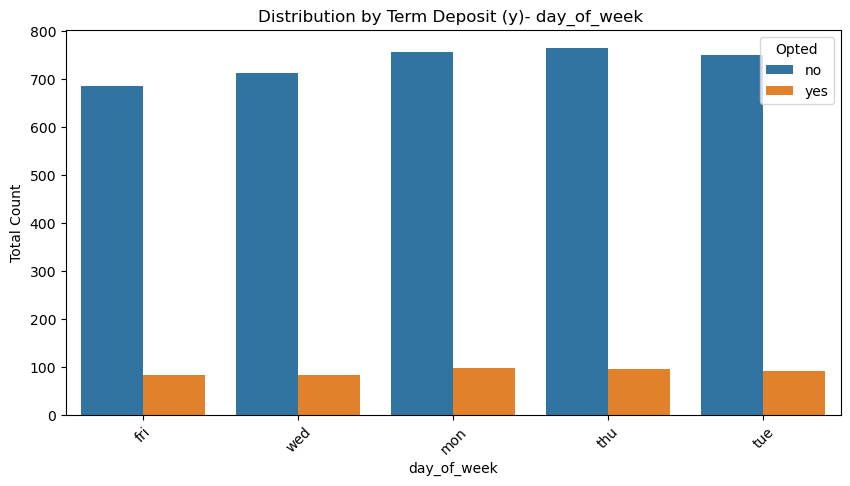

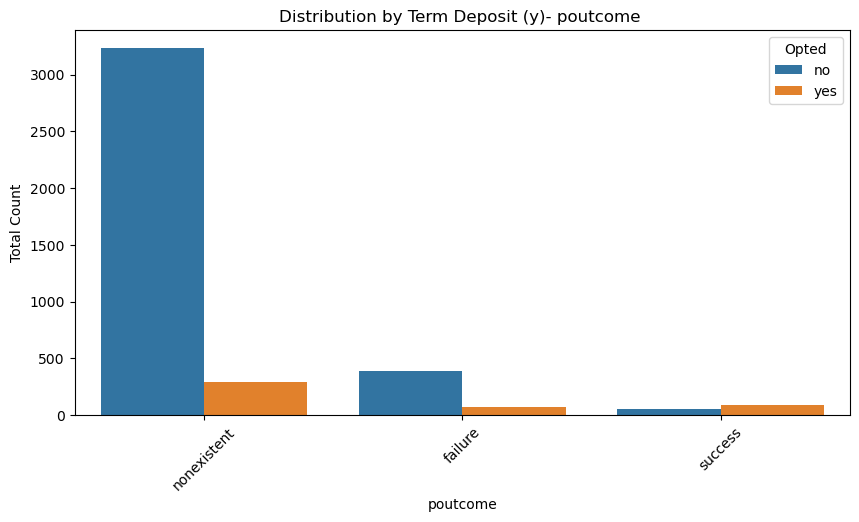

In [76]:
##Categorical feature plot
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=new_df, x=feature, hue='y')
    plt.xticks(rotation=45)
    plt.legend(title='Opted')
    plt.title(f'Distribution by Term Deposit (y)- {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Total Count')
    plt.show()


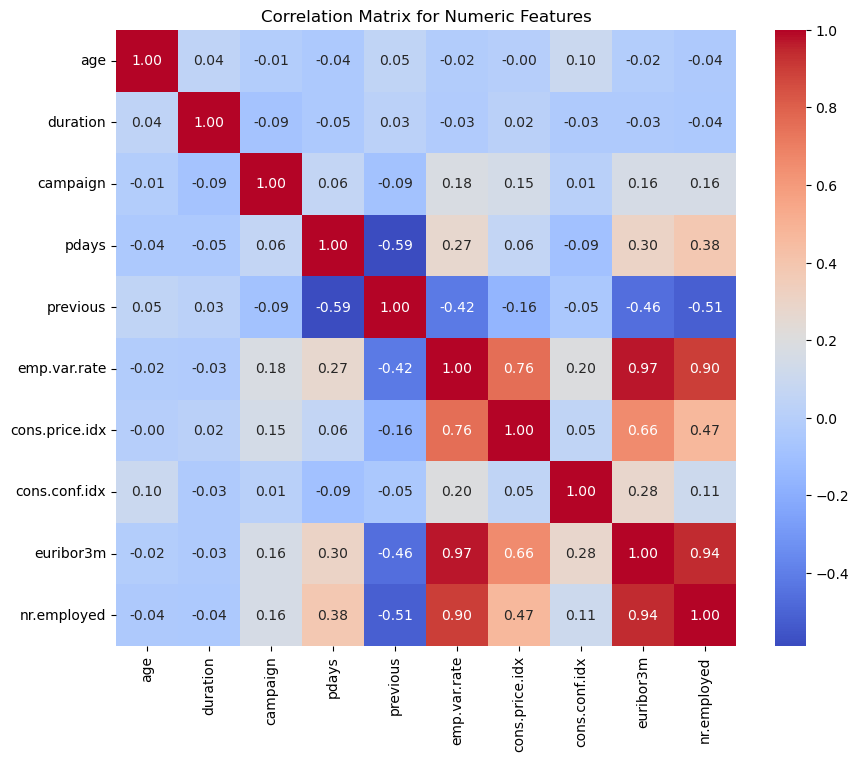

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


In [77]:
# Calculate correlations for numeric features
correlation_matrix = new_df[numeric_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

correlation_matrix

## Data Analysis ##

- There is strong correlation between (nr.employed, euribor3m) and (emp.var.rat and euribor3m) which means we can remove some features from the dataset.
- The Term deposit bar chart depicits most clients dont opt for it.
- Married couple most like to opt out of term deposit
